In [233]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/body-signal-of-smoking/smoking.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_train.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_train.csv


# Importing Data

In [234]:
data=pd.read_csv('/kaggle/input/body-signal-of-smoking/smoking.csv')
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [235]:
data.shape

(55692, 27)

In [236]:
col=data.columns
col

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [237]:
for i in col:
    print(data[i].value_counts())

0        1
46400    1
46387    1
46388    1
46389    1
        ..
23182    1
23183    1
23185    1
23186    1
55691    1
Name: ID, Length: 55692, dtype: int64
M    35401
F    20291
Name: gender, dtype: int64
40    15181
45     7037
60     6167
50     5549
55     5020
35     4480
30     4056
25     3525
20     1605
65     1336
70      827
75      614
80      280
85       15
Name: age, dtype: int64
170    11381
165     9949
160     8919
175     8009
155     7627
150     4492
180     3149
145     1236
185      681
140      205
190       37
135        6
130        1
Name: height(cm), dtype: int64
65     8196
60     8139
70     7722
55     7326
75     6088
50     5564
80     4117
85     2529
45     2370
90     1477
95      816
40      468
100     436
105     200
110     113
115      49
35       39
120      23
125       8
30        7
130       4
135       1
Name: weight(kg), dtype: int64
80.0     1917
82.0     1775
81.0     1737
84.0     1695
78.0     1667
         ... 
109.4       1
59.7   

In [238]:
data.drop(['oral','ID'],axis=1,inplace=True)

In [239]:
col=data.columns

In [240]:
for i in col:
    print(i," ",data[i].isna().sum())

gender   0
age   0
height(cm)   0
weight(kg)   0
waist(cm)   0
eyesight(left)   0
eyesight(right)   0
hearing(left)   0
hearing(right)   0
systolic   0
relaxation   0
fasting blood sugar   0
Cholesterol   0
triglyceride   0
HDL   0
LDL   0
hemoglobin   0
Urine protein   0
serum creatinine   0
AST   0
ALT   0
Gtp   0
dental caries   0
tartar   0
smoking   0


# Visualization

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

By seeing results of the above value counts 
we can see that fee numerical features are also categorical in nature like hearing

In [242]:
for i in col:
    clf=data[i].unique()
    print(i," ",len(clf))

gender   2
age   14
height(cm)   13
weight(kg)   22
waist(cm)   566
eyesight(left)   19
eyesight(right)   17
hearing(left)   2
hearing(right)   2
systolic   130
relaxation   95
fasting blood sugar   276
Cholesterol   286
triglyceride   390
HDL   126
LDL   289
hemoglobin   145
Urine protein   6
serum creatinine   38
AST   219
ALT   245
Gtp   488
dental caries   2
tartar   2
smoking   2


### Categorical Columns
1. gender - 2
2. age - 14
3. height(cm) - 13
4. weight(kg) - 22
5. eyesight(left) -  19
6. eyesight(right) -  17
7. hearing(left) - 2
8. hearing(right) - 2
9. Urine protein - 6
10. dental caries - 2 
11. tartar - 2

In [243]:
data['age'] = data.age.astype(object)
data['height(cm)'] = data['height(cm)'].astype(object)
data['weight(kg)'] = data['weight(kg)'].astype(object)
data['eyesight(left)'] = data['eyesight(left)'].astype(object)
data['eyesight(right)'] = data['eyesight(right)'].astype(object)
data['hearing(left)'] = data['hearing(left)'].astype(object)
data['hearing(right)'] = data['hearing(right)'].astype(object)
data['Urine protein'] = data['Urine protein'].astype(object)
data['dental caries'] = data['dental caries'].astype(object)

In [244]:
corr=data.corr()
corr

,waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
waist(cm),1.000000,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.235024,0.142690,0.252478,0.243141,0.226259
systolic,0.316922,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.072288,0.083204,0.094893,0.165724,0.073109
relaxation,0.292627,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.085033,0.085151,0.106648,0.177648,0.108309
fasting blood sugar,0.211132,0.172700,0.147879,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.041341,0.068772,0.087616,0.182414,0.100279
Cholesterol,0.065467,0.059572,0.095357,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.000129,0.026594,0.050676,0.083531,-0.028548
triglyceride,0.361922,0.198826,0.215541,0.227746,0.247581,1.000000,-0.411752,0.025739,0.273353,0.124986,0.101696,0.175164,0.301876,0.251799
HDL,-0.376203,-0.088487,-0.089410,-0.121274,0.168623,-0.411752,1.000000,-0.056398,-0.240095,-0.175325,-0.036705,-0.128795,-0.054325,-0.178470
LDL,0.072817,0.016569,0.041017,-0.019615,0.738975,0.025739,-0.056398,1.000000,0.052903,0.027045,0.000388,0.031576,-0.007872,-0.045220
hemoglobin,0.387066,0.186514,0.232899,0.099921,0.061503,0.273353,-0.240095,0.052903,1.000000,0.371382,0.120575,0.202025,0.223844,0.400678
serum creatinine,0.235024,0.072288,0.085033,0.041341,-0.000129,0.124986,-0.175325,0.027045,0.371382,1.000000,0.048548,0.083602,0.102411,0.216812


<AxesSubplot:>

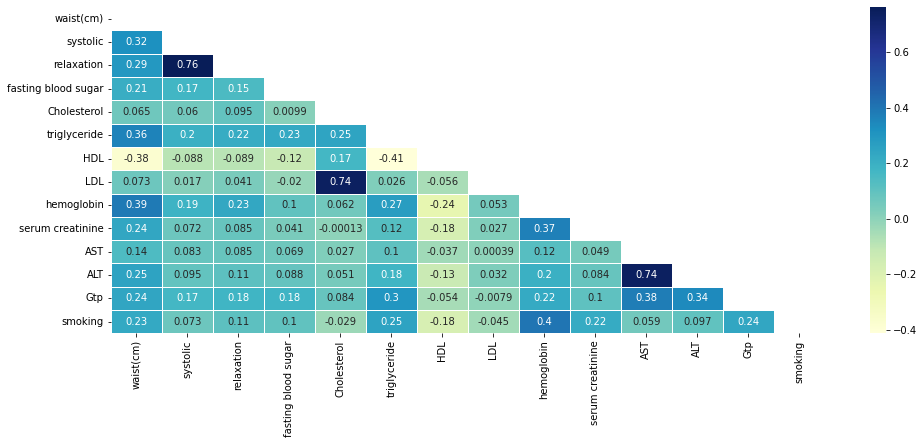

In [245]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, linewidths=1,mask = mask, cmap="YlGnBu")

# Feature Engineering

### First thought what I have to do about the categorical data.

### ordinal / OHE / Label Encoding?

## What to apply for which column ?

### Categorical Columns
1. gender - OHE
2. age - 14
3. height(cm) - 13
4. weight(kg) - 22
5. eyesight(left) -  19
6. eyesight(right) -  17
7. hearing(left) - OHE
8. hearing(right) - OHE
9. Urine protein - 6
10. dental caries - OHE
11. tartar - OHE

### For other clmns OHE for all values will make tha data set sparse 
### I dont fint the values to be ordinal but we can give a try later
### for now we will keep top n values in the column and a other value and then appply OHE 
### this would prevent from data getting too sparse

In [246]:
enc1=pd.get_dummies(data, columns = ['gender','hearing(left)','hearing(right)',
                                     'Urine protein','dental caries','tartar','smoking'],
                    drop_first=True)

In [247]:
enc1['age'].value_counts()

40    15181
45     7037
60     6167
50     5549
55     5020
35     4480
30     4056
25     3525
20     1605
65     1336
70      827
75      614
80      280
85       15
Name: age, dtype: int64

In [248]:
lst_10=enc1.age.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [249]:
for categories in lst_10:
    enc1['age_'+str(categories)]=np.where(enc1['age']==categories,1,0)

In [250]:
enc1['height(cm)'].value_counts()

170    11381
165     9949
160     8919
175     8009
155     7627
150     4492
180     3149
145     1236
185      681
140      205
190       37
135        6
130        1
Name: height(cm), dtype: int64

In [251]:
lst_8=enc1['height(cm)'].value_counts().sort_values(ascending=False).head(8).index
lst_8=list(lst_8)

In [252]:
for categories in lst_8:
    enc1['height_'+str(categories)]=np.where(enc1['height(cm)']==categories,1,0)

In [253]:
enc1['weight(kg)'].value_counts()

65     8196
60     8139
70     7722
55     7326
75     6088
50     5564
80     4117
85     2529
45     2370
90     1477
95      816
40      468
100     436
105     200
110     113
115      49
35       39
120      23
125       8
30        7
130       4
135       1
Name: weight(kg), dtype: int64

In [254]:
lst_10=enc1['weight(kg)'].value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)
for categories in lst_10:
    enc1['weight_'+str(categories)]=np.where(enc1['weight(kg)']==categories,1,0)

In [255]:
enc1['eyesight(left)'].value_counts()

1.2    12746
1.0    12217
1.5     7825
0.8     5267
0.9     5125
0.7     4445
0.6     2508
0.5     2113
0.4     1218
0.3      881
0.2      464
2.0      401
0.1      354
9.9       92
1.6       20
1.3       10
1.1        3
1.9        2
1.8        1
Name: eyesight(left), dtype: int64

In [256]:
lst_9=enc1['eyesight(left)'].value_counts().sort_values(ascending=False).head(9).index
lst_9=list(lst_9)
for categories in lst_9:
    enc1['eyesight_left_'+str(categories)]=np.where(enc1['eyesight(left)']==categories,1,0)

In [257]:
enc1['eyesight(right)'].value_counts()

1.2    12539
1.0    12498
1.5     7536
0.8     5418
0.9     5277
0.7     4325
0.6     2402
0.5     2160
0.4     1309
0.3      842
0.2      522
2.0      377
0.1      366
9.9       92
1.6       20
1.3        7
1.1        2
Name: eyesight(right), dtype: int64

In [258]:
lst_9=enc1['eyesight(right)'].value_counts().sort_values(ascending=False).head(9).index
lst_9=list(lst_9)
for categories in lst_9:
    enc1['eyesight_right_'+str(categories)]=np.where(enc1['eyesight(right)']==categories,1,0)

In [259]:
enc1.drop(['age','eyesight(left)','eyesight(right)',
            'weight(kg)','height(cm)'],
          axis=1,inplace=True)

In [260]:
len(enc1.columns)

70

In [261]:
for i in enc1.columns:
    print(i,' ',enc1[i].isna().sum())

waist(cm)   0
systolic   0
relaxation   0
fasting blood sugar   0
Cholesterol   0
triglyceride   0
HDL   0
LDL   0
hemoglobin   0
serum creatinine   0
AST   0
ALT   0
Gtp   0
gender_M   0
hearing(left)_2.0   0
hearing(right)_2.0   0
Urine protein_2.0   0
Urine protein_3.0   0
Urine protein_4.0   0
Urine protein_5.0   0
Urine protein_6.0   0
dental caries_1   0
tartar_Y   0
smoking_1   0
age_40   0
age_45   0
age_60   0
age_50   0
age_55   0
age_35   0
age_30   0
age_25   0
age_20   0
age_65   0
height_170   0
height_165   0
height_160   0
height_175   0
height_155   0
height_150   0
height_180   0
height_145   0
weight_65   0
weight_60   0
weight_70   0
weight_55   0
weight_75   0
weight_50   0
weight_80   0
weight_85   0
weight_45   0
weight_90   0
eyesight_left_1.2   0
eyesight_left_1.0   0
eyesight_left_1.5   0
eyesight_left_0.8   0
eyesight_left_0.9   0
eyesight_left_0.7   0
eyesight_left_0.6   0
eyesight_left_0.5   0
eyesight_left_0.4   0
eyesight_right_1.2   0
eyesight_right_1.0 

# Feature Selection

In [262]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [263]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_features.fit(data1,enc1['smoking_1'])

In [264]:
data1=enc1[['waist(cm)','systolic','relaxation','fasting blood sugar','Cholesterol',
'triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','ALT','Gtp']]

## of the 13 numerical columns selecting top 10 only

In [265]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(data1.columns)

In [266]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [267]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,waist(cm),2988.775457
1,systolic,458.240371
2,relaxation,805.307744
3,fasting blood sugar,2438.600880
4,Cholesterol,303.701528
5,triglyceride,143068.196323
6,HDL,6726.187110
7,LDL,1659.191342
8,hemoglobin,1496.583744
9,serum creatinine,145.040550


In [268]:
features_rank.nlargest(10,'Score')

,Features,Score
12,Gtp,197385.757377
5,triglyceride,143068.196323
11,ALT,18692.510526
6,HDL,6726.187110
0,waist(cm),2988.775457
10,AST,2797.676191
3,fasting blood sugar,2438.600880
7,LDL,1659.191342
8,hemoglobin,1496.583744
2,relaxation,805.307744


In [269]:
enc1.drop(['Cholesterol','serum creatinine','systolic'],axis=1,inplace=True)

In [270]:
enc1.shape

(55692, 67)

# Model Building

In [271]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

In [272]:
X=enc1.drop(['smoking_1'],axis=1)
y=enc1['smoking_1']

In [273]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [276]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42,solver='lbfgs', max_iter=100)
clf.fit(X_train,y_train.values.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [277]:
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     10557
           1       0.63      0.64      0.64      6151

    accuracy                           0.73     16708
   macro avg       0.71      0.71      0.71     16708
weighted avg       0.73      0.73      0.73     16708



In [278]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [279]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train.values.ravel())
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10557
           1       0.69      0.68      0.68      6151

    accuracy                           0.77     16708
   macro avg       0.75      0.75      0.75     16708
weighted avg       0.77      0.77      0.77     16708



In [280]:
params = {
    'max_depth': range(1,20,2),
    'min_samples_leaf': range(1,100,5),
    'min_samples_split': range(2,10),
    'criterion': ["gini", "entropy"],
    'splitter':['best', 'random'],
    'max_features': ['auto']
}

In [281]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy",error_score='raise')
grid_search.fit(X_train, y_train.values.ravel())

Fitting 4 folds for each of 6400 candidates, totalling 25600 fits


GridSearchCV(cv=4, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 100, 5),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [282]:
dt_best = grid_search.best_estimator_

In [283]:
pred = dt_best.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10557
           1       0.66      0.64      0.65      6151

    accuracy                           0.75     16708
   macro avg       0.73      0.73      0.73     16708
weighted avg       0.75      0.75      0.75     16708



In [284]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train.values.ravel())
pred = dt_best.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10557
           1       0.66      0.64      0.65      6151

    accuracy                           0.75     16708
   macro avg       0.73      0.73      0.73     16708
weighted avg       0.75      0.75      0.75     16708



In [285]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [286]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.4min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.3min


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  30.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 1.8min
[CV] END bootstrap=False, max_depth=60

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [287]:
pred = rf_random.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     10557
           1       0.74      0.79      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



In [288]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time= 3.3min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time= 1.9min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  54.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.4min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [289]:
pred = grid_search.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     10557
           1       0.71      0.73      0.72      6151

    accuracy                           0.79     16708
   macro avg       0.78      0.78      0.78     16708
weighted avg       0.79      0.79      0.79     16708



# XGB

In [293]:
from xgboost import XGBClassifier

In [294]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [295]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     10557
           1       0.65      0.70      0.68      6151

    accuracy                           0.75     16708
   macro avg       0.74      0.74      0.74     16708
weighted avg       0.76      0.75      0.75     16708

